In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/166.8 GB disk)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Downloading dataset
!unzip -q /content/drive/MyDrive/ship_dataset.zip -d ../

##IF YOU WANT TO RUN DATASET CORRECTLY YOU HAVE TO EDIT DATASET LIKE THIS 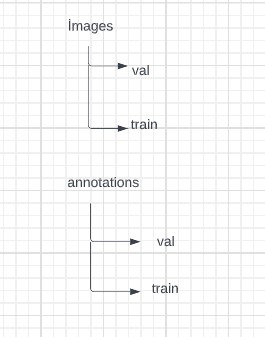

In [ ]:
!zip -r /content/detectionyolov5_2.zip /content/yolov5/runs/detection_last/labels #Download detection resluts coordinates

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  adding: content/yolov5/runs/detection_last/labels/Gao_ship_hh_0201710256501028031.txt (deflated 13%)
  adding: content/yolov5/runs/detection_last/labels/Sen_ship_hv_02017091601040026.txt (deflated 26%)
  adding: content/yolov5/runs/detection_last/labels/Gao_ship_hv_020170309700105017.txt (deflated 16%)
  adding: content/yolov5/runs/detection_last/labels/Gao_ship_hh_0201709013001012024.txt (deflated 13%)
  adding: content/yolov5/runs/detection_last/labels/Gao_ship_hh_0201710256501019023.txt (deflated 18%)
  adding: content/yolov5/runs/detection_last/labels/Sen_ship_hh_02017102901053036.txt (deflated 13%)
  adding: content/yolov5/runs/detection_last/labels/Gao_ship_hh_0201801212902024034.txt (deflated 10%)
  adding: content/yolov5/runs/detection_last/labels/Gao_ship_hv_0201711189803010012.txt (deflated 43%)
  adding: content/yolov5/runs/detection_last/labels/Sen_ship_hv_0201703200105803.txt (deflated 22%)
  adding: content/yolov5/runs/dete

# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
#For testing model
!python /content/yolov5/detect.py --weights '/content/content/yolov5/runs/train/exp/weights/best.pt'  --conf 0.3 --source '/content/yeni/images/val/*jpg' --save-txt --save-conf --project 'runs' --name 'detection_last' --augment --line=3


Görüntülenen çıkış son 5000 satıra kısaltıldı.
image 5800/10796 /content/yeni/images/val/Gao_ship_vh_02017011564020806.jpg: 640x640 1 Ship, Done. (0.032s)
image 5801/10796 /content/yeni/images/val/Gao_ship_vh_02017011564020809.jpg: 640x640 1 Ship, Done. (0.032s)
image 5802/10796 /content/yeni/images/val/Gao_ship_vh_02017011564030901.jpg: 640x640 1 Ship, Done. (0.032s)
image 5803/10796 /content/yeni/images/val/Gao_ship_vh_02017011564030902.jpg: 640x640 1 Ship, Done. (0.036s)
image 5804/10796 /content/yeni/images/val/Gao_ship_vh_02017011565020409.jpg: 640x640 4 Ships, Done. (0.033s)
image 5805/10796 /content/yeni/images/val/Gao_ship_vh_02017011565020508.jpg: 640x640 1 Ship, Done. (0.033s)
image 5806/10796 /content/yeni/images/val/Gao_ship_vh_02017011565030502.jpg: 640x640 2 Ships, Done. (0.032s)
image 5807/10796 /content/yeni/images/val/Gao_ship_vh_02017011565030503.jpg: 640x640 1 Ship, Done. (0.036s)
image 5808/10796 /content/yeni/images/val/Gao_ship_vh_02017011565030603.jpg: 640x640 1 

# 2. Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets.

## COCO validation


In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
#For validaton code
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True
YOLOv5 🚀 v6.0-48-g84a8099 torch 1.10.0+cu102 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

100% 166M/166M [00:03<00:00, 54.1MB/s]

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients
val: Scanning '../datasets/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupted: 100% 5000/5000 [00:01<00:00, 2636.64it/s]
val: New cache created: ../datasets/coco/val2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 157/157 [01:12<00:00,  2.17it/s]
                 all       5000      36335      0.729       0.63      0.683      0.496
Speed: 0.1ms pre-process, 4.9ms inference, 1.9ms NMS per image a

# 3. Train


Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

In [ ]:
# Train YOLOv5s on COCO128 for 30 epochs
!python train.py --img 640 --batch 32 --epochs 30 --data coco128.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-161-ge54e758 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0

# 4. Visualize

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and val jpgs to see mosaics, labels, predictions and augmentation effects. Note an Ultralytics **Mosaic Dataloader** is used for training (shown below), which combines 4 images into 1 mosaic during training.


Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

```python
from utils.plots import plot_results 
plot_results('path/to/results.csv')  # plot 'results.csv' as 'results.png'
```

<img align="left" width="800" alt="COCO128 Training Results" src="https://user-images.githubusercontent.com/26833433/126906780-8c5e2990-6116-4de6-b78a-367244a33ccf.png">